In [1]:
import datetime
start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2017, 10, 25)

import pandas_datareader
data = pandas_datareader.DataReader("SPY", "yahoo", start, end)
price = data[["Adj Close"]]
price

,Adj Close
Date,
2007-01-03,113.195320
2007-01-04,113.435524
2007-01-05,112.530762
2007-01-08,113.051155
2007-01-09,112.955101
2007-01-10,113.331413
2007-01-11,113.827873
2007-01-12,114.692635
2007-01-16,114.468422


In [2]:
def myStrategy01(pastData, N, U, D):
    import numpy
    import pandas
    action = 0
    sharpe = numpy.nan
    data_length = len(pastData)
    if data_length >= N + 1:
        window_data = pastData.iloc[-N:]
        data_return = window_data.pct_change().fillna(0)
        return_mean = data_return.mean()
        return_vol = data_return.std()
        sharpe = return_mean.values[0] / return_vol.values[0]
        if sharpe > U:
            action = 1
        elif sharpe < D:
            action = -1
    return action, sharpe

In [36]:
import numpy
N = 30
U = 0.0005
D = -0.0005
ini_capital = 1e3
capital = ini_capital
data_count = len(price)
actions = numpy.zeros(data_count)
real_actions = numpy.zeros(data_count)
ratio = numpy.zeros(data_count)
value = numpy.zeros(data_count)
value[0] = capital
holding = numpy.zeros(data_count)
curr_action = 0
for i in range(data_count):
    actions[i], ratio[i] = myStrategy01(price[:i], N, U, D);
    if i == 0:
        real_actions[i] = actions[i]
        curr_action = actions[i]
        if real_actions[i] == 1:
            holding[i] = capital / price["Adj Close"].iloc[i]
            capital = 0.0
    else:
        holding[i] = holding[i-1]
        if not actions[i] == curr_action and not actions[i] == 0:
            real_actions[i] = actions[i]
            curr_action = actions[i]
            if real_actions[i] == 1:
                holding[i] = capital / price["Adj Close"].iloc[i]
                capital = 0.0
            elif real_actions[i] == -1:
                capital = holding[i] * price["Adj Close"].iloc[i]
                holding[i] = 0.0
    value[i] = holding[i] * price["Adj Close"].iloc[i] + capital

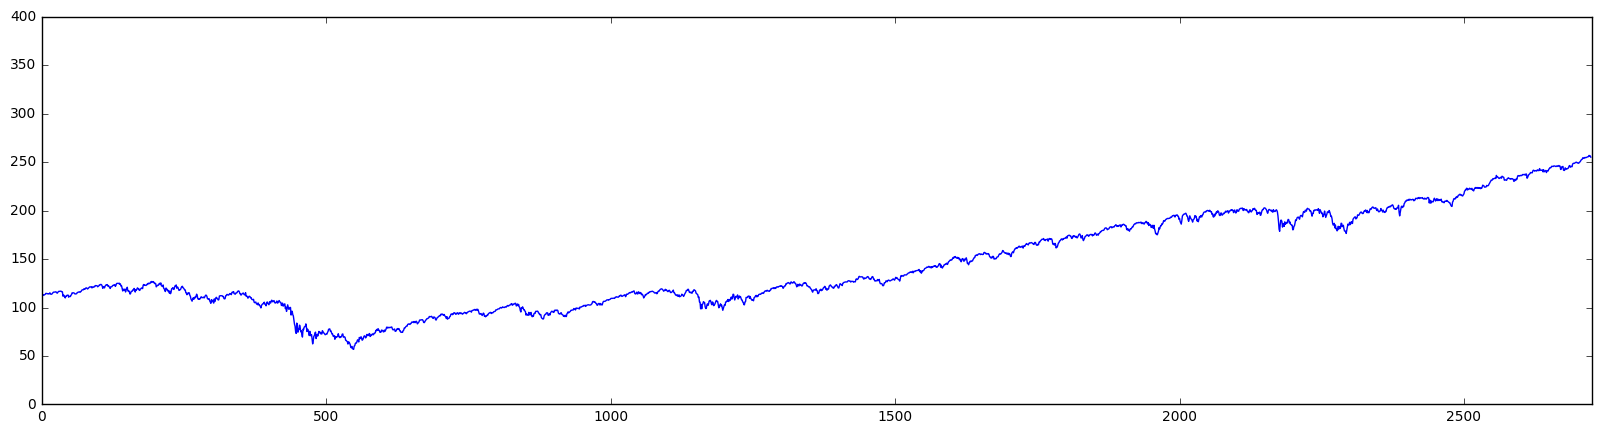

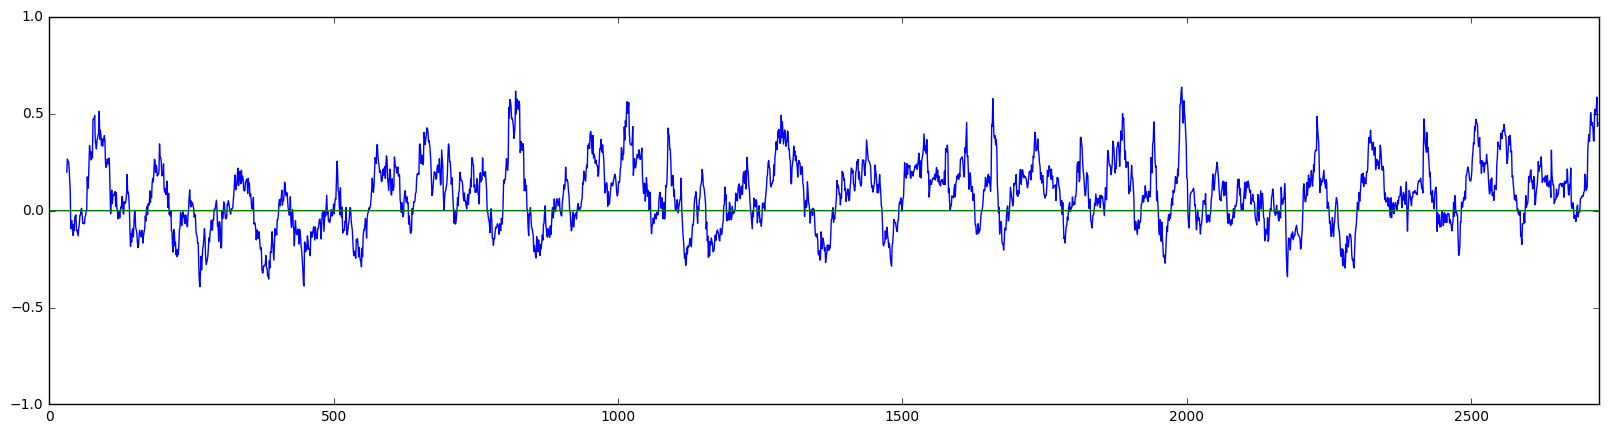

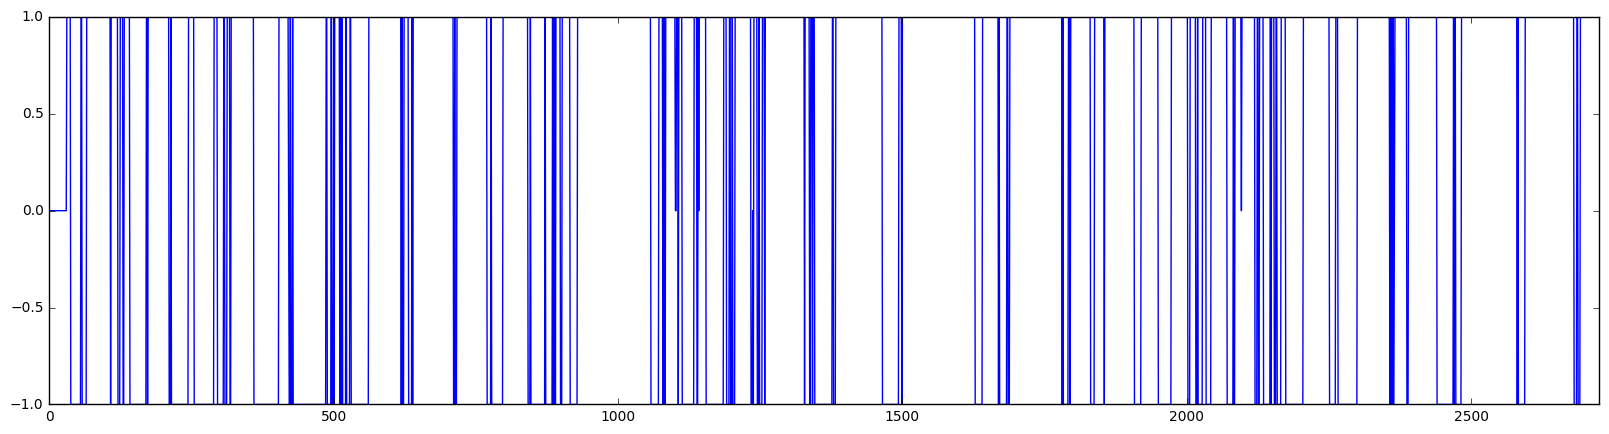

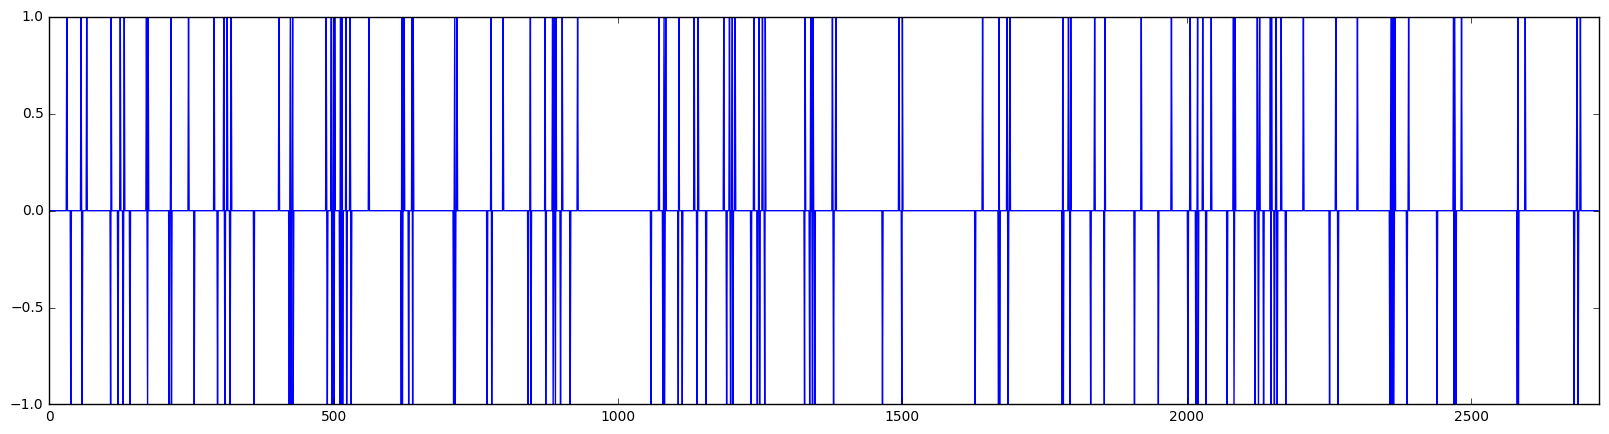

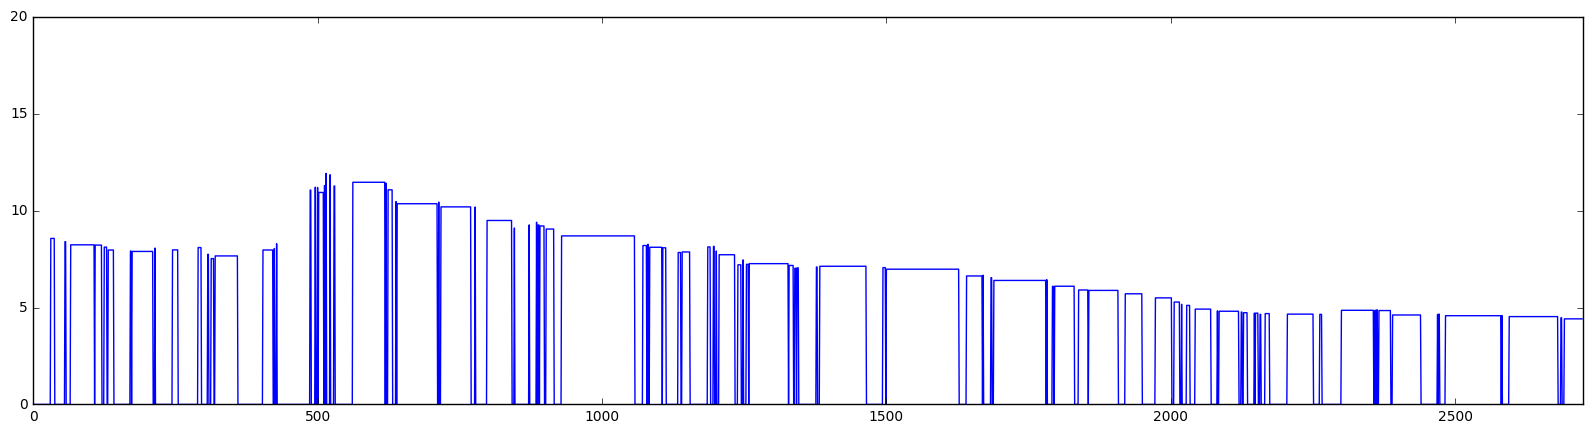

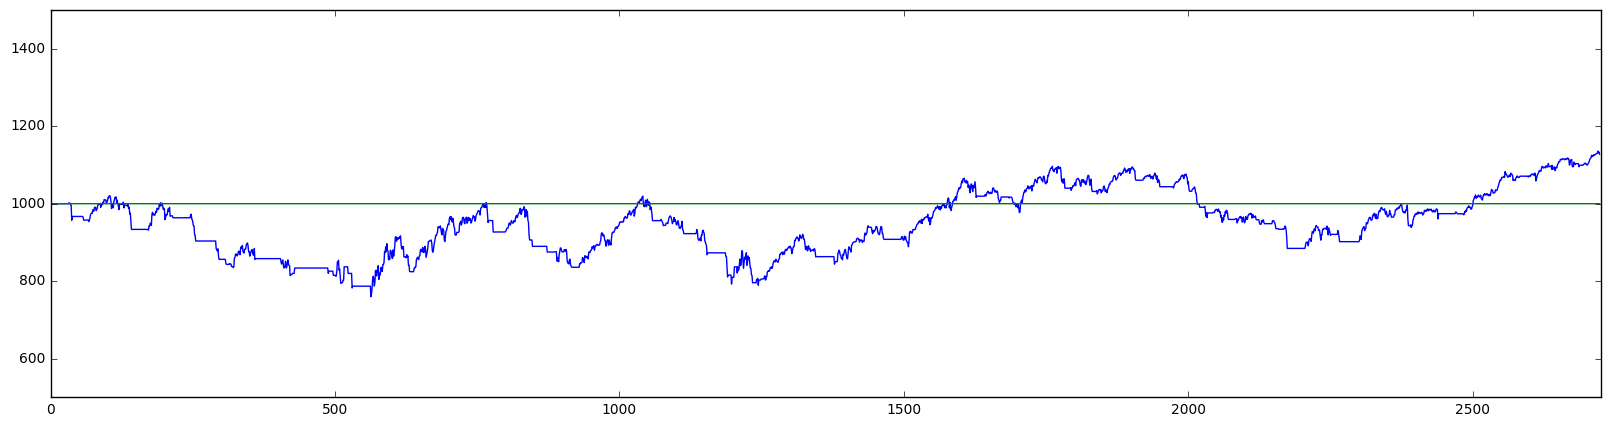

In [37]:
from matplotlib import pyplot
# Price
pyplot.figure(figsize = [20, 5])
pyplot.plot(price.values)
pyplot.axis([0, len(ratio)+1, 0, 400])
pyplot.show()
# Rolling Sharpe Ratio
pyplot.figure(figsize = [20, 5])
pyplot.plot(ratio)
pyplot.plot(numpy.zeros(len(ratio)))
pyplot.axis([0, len(ratio)+1, -1, 1])
pyplot.show()
# Actions from strategy
pyplot.figure(figsize = [20, 5])
pyplot.plot(actions)
pyplot.axis([0, len(ratio)+1, -1, 1])
pyplot.show()
# Real Actions
pyplot.figure(figsize = [20, 5])
pyplot.plot(real_actions)
pyplot.axis([0, len(ratio)+1, -1, 1])
pyplot.show()
# Holding
pyplot.figure(figsize = [20, 5])
pyplot.plot(holding)
pyplot.axis([0, len(ratio)+1, 0, 20])
pyplot.show()
# Holding
pyplot.figure(figsize = [20, 5])
pyplot.plot(value)
pyplot.plot(ini_capital * numpy.ones(len(ratio)))
pyplot.axis([0, len(ratio)+1, 500, 1500])
pyplot.show()